# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
data_dir = "https://dlsun.github.io/pods/data/"
titanic = pd.read_csv(data_dir + "titanic.csv")
titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [2]:
# Code here
titanic["class"].unique()
titanic["type"] = titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})
titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [3]:
titanic= titanic[titanic["type"] == "passenger"]
titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [4]:
pd.crosstab(titanic["embarked"], titanic["class"], normalize= True)

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
#her code
df_third = titanic[titanic["class"] == "3rd"]
df_third['embarked'].value_counts(normalize=True)
df_first = titanic[titanic["class"] == "1st"]
df_first['embarked'].value_counts(normalize=True)
df_second = titanic[titanic["class"] == "2nd"]
df_second['embarked'].value_counts(normalize=True)

jont_ec= pd.crosstab(titanic["embarked"], titanic["class"], normalize= True)
jont_ec

class,1st,2nd,3rd
embarked,,,
B,0.002278,0.004556,0.000000
C,0.108580,0.019742,0.077449
Q,0.002278,0.005315,0.085801
S,0.132878,0.186029,0.375095


In [6]:
# her code pt2
jont_ec
marg_class= jont_ec.sum(axis=0)
conditional_eonc=jont_ec.divide(marg_class)
conditional_eonc

class,1st,2nd,3rd
embarked,,,
B,0.009259,0.021127,0.000000
C,0.441358,0.091549,0.143865
Q,0.009259,0.024648,0.159379
S,0.540123,0.862676,0.696756


In [58]:
#conditional for class given embarked
titanic["class"].value_counts(normalize=True)

,proportion
class,
3rd,0.538345
1st,0.246014
2nd,0.215642


In [7]:
# Code here
titanic_cond = pd.crosstab(titanic["class"], titanic["embarked"], normalize='index')
titanic_cond

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [8]:
titanic_cond1 = pd.crosstab(titanic["embarked"], titanic["class"], normalize='index')
titanic_cond1

class,1st,2nd,3rd
embarked,,,
B,0.333333,0.666667,0.000000
C,0.527675,0.095941,0.376384
Q,0.024390,0.056911,0.918699
S,0.191466,0.268053,0.540481


69.68% of third class passengers departed from Southampton
 54.05% of all passengers who deparked at southampton were in third class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [9]:
#her code
conditional_eonc['embarked']= conditional_eonc.index
conditional_eonc


class,1st,2nd,3rd,embarked
embarked,,,,
B,0.009259,0.021127,0.000000,B
C,0.441358,0.091549,0.143865,C
Q,0.009259,0.024648,0.159379,Q
S,0.540123,0.862676,0.696756,S


<positron-console-cell-10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


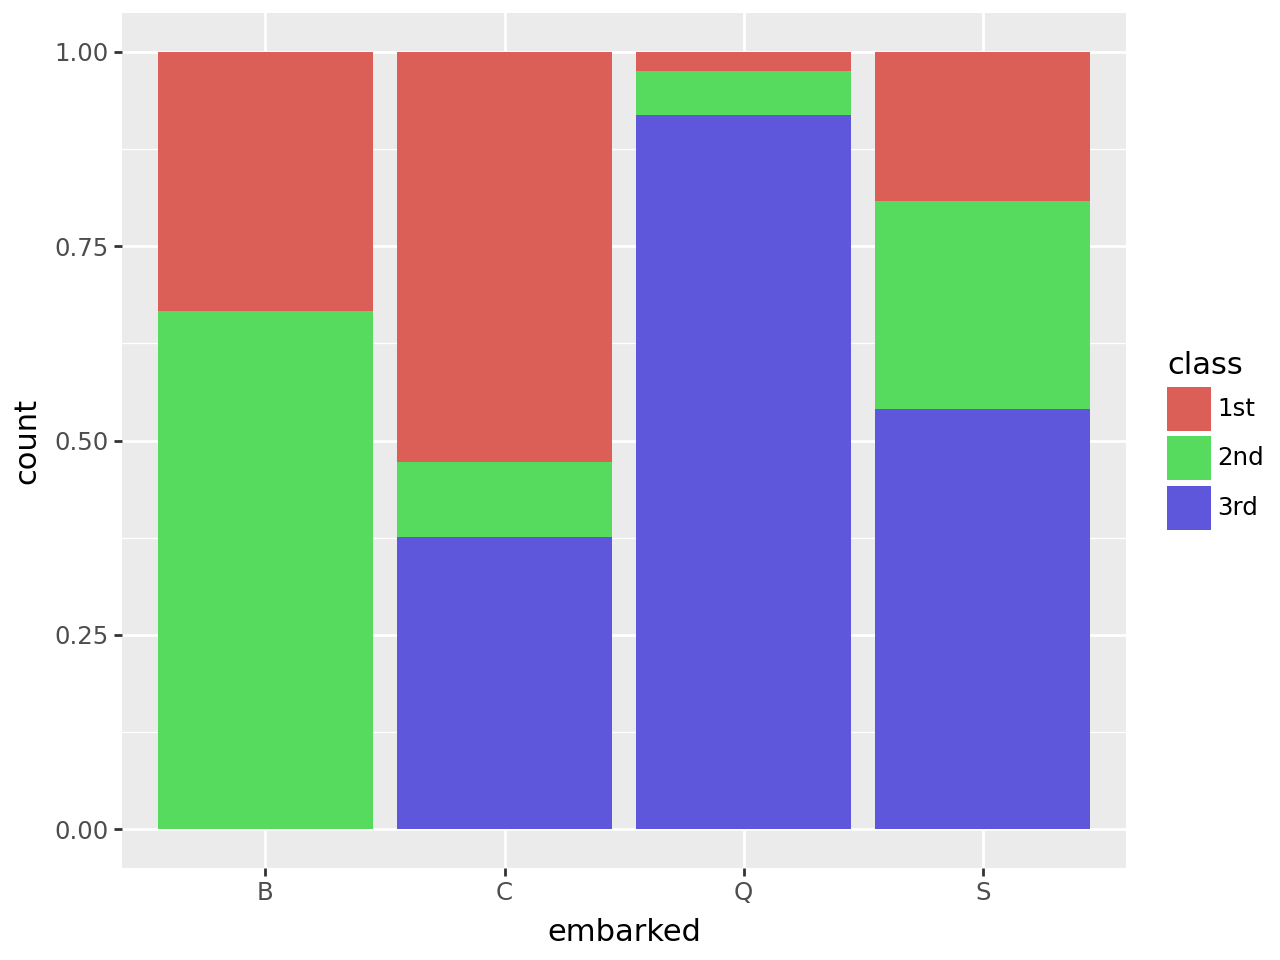

In [10]:
# Code here
titanic["class"] = titanic["class"].astype(str)
titanic.dropna()
(ggplot(titanic,
aes(
  x = "embarked",
  fill = "class"
))
+ geom_bar(position = "fill")
)